In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

In [4]:
register_matplotlib_converters()

In [5]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [6]:
# Clean data
print(df['value'].quantile(0.025)) 
print(df['value'].quantile(0.975)) 
df = df[(df['value'] >= 17876.4) & (df['value'] <= 177613.075)]
df['value'].describe()

17876.4
177613.075


count      1238.000000
mean      63060.147819
std       31674.626598
min       18060.000000
25%       37244.250000
50%       57197.500000
75%       81646.500000
max      177588.000000
Name: value, dtype: float64

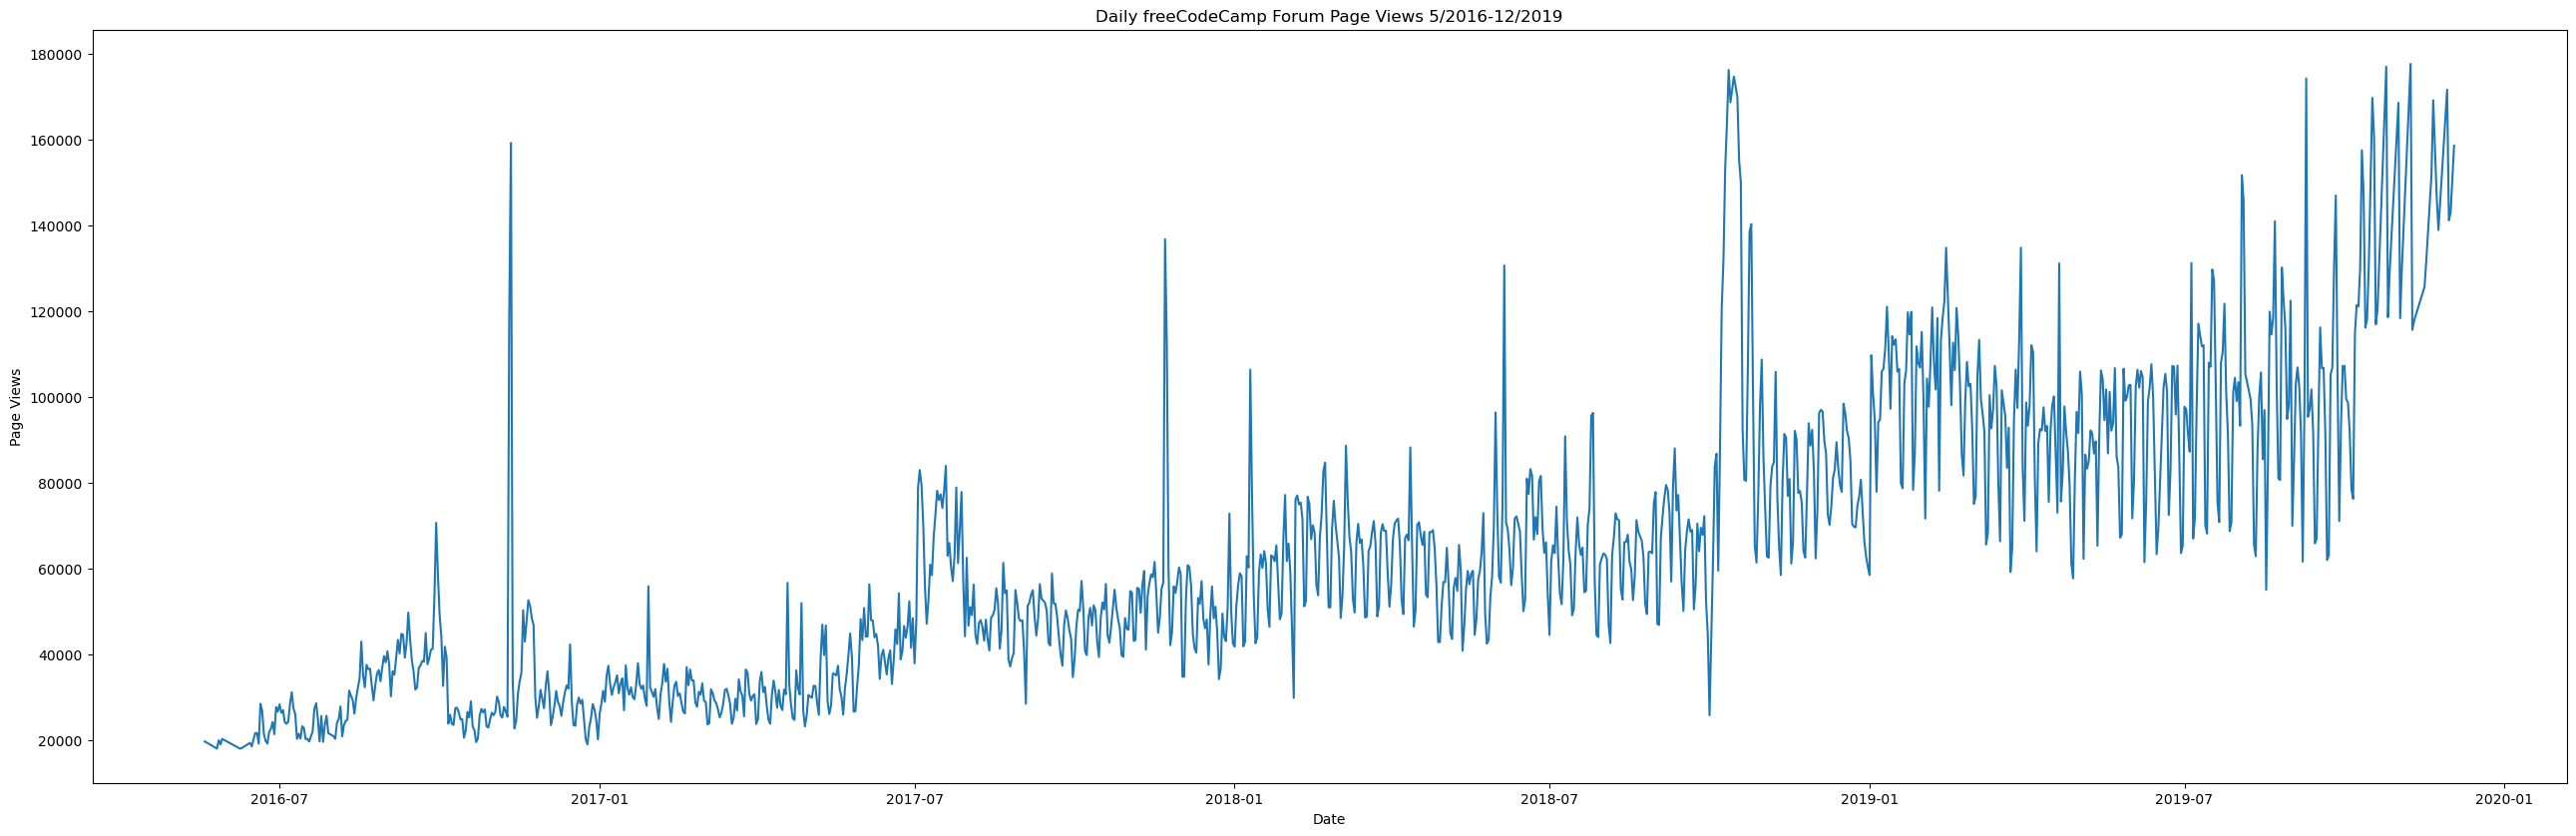

In [7]:
# Draw line plot
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.plot(df.index, df['value'])
plt.show()

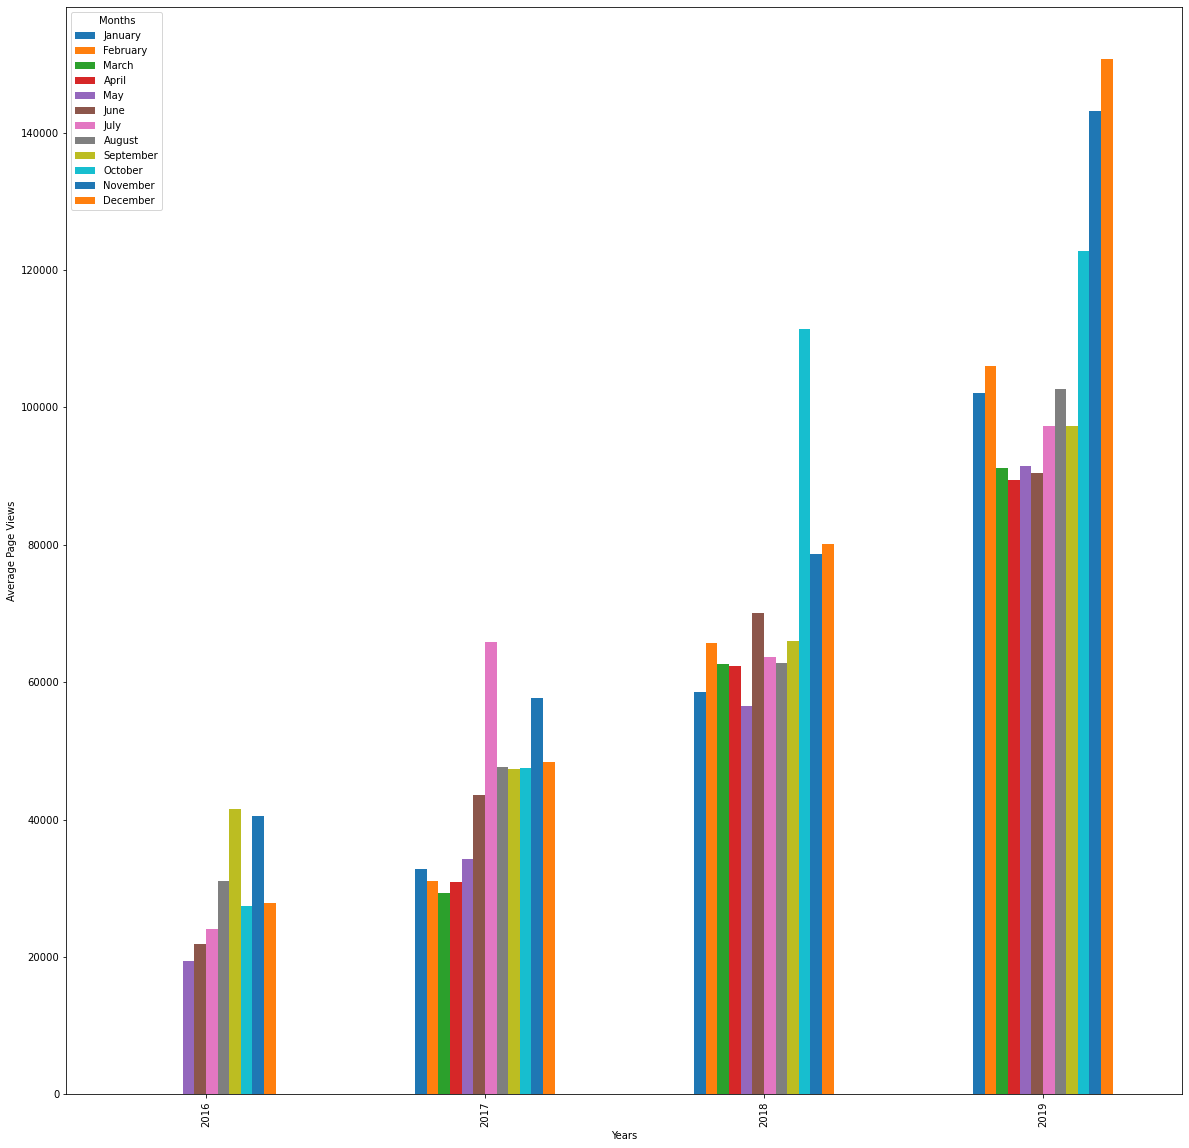

In [8]:
# Draw bar plot
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
cbar = df_bar.groupby([df.index.year, df.index.month])['value'].agg(np.mean).rename_axis(['year', 'month'])
cbar = cbar.reset_index()
df_pivtab = pd.pivot_table(cbar,
values = 'value',
index = 'year',
columns = 'month')
ax = df_pivtab.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(20,20)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
            'September', 'October', 'November', 'December'], title = 'Months')

In [10]:
# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

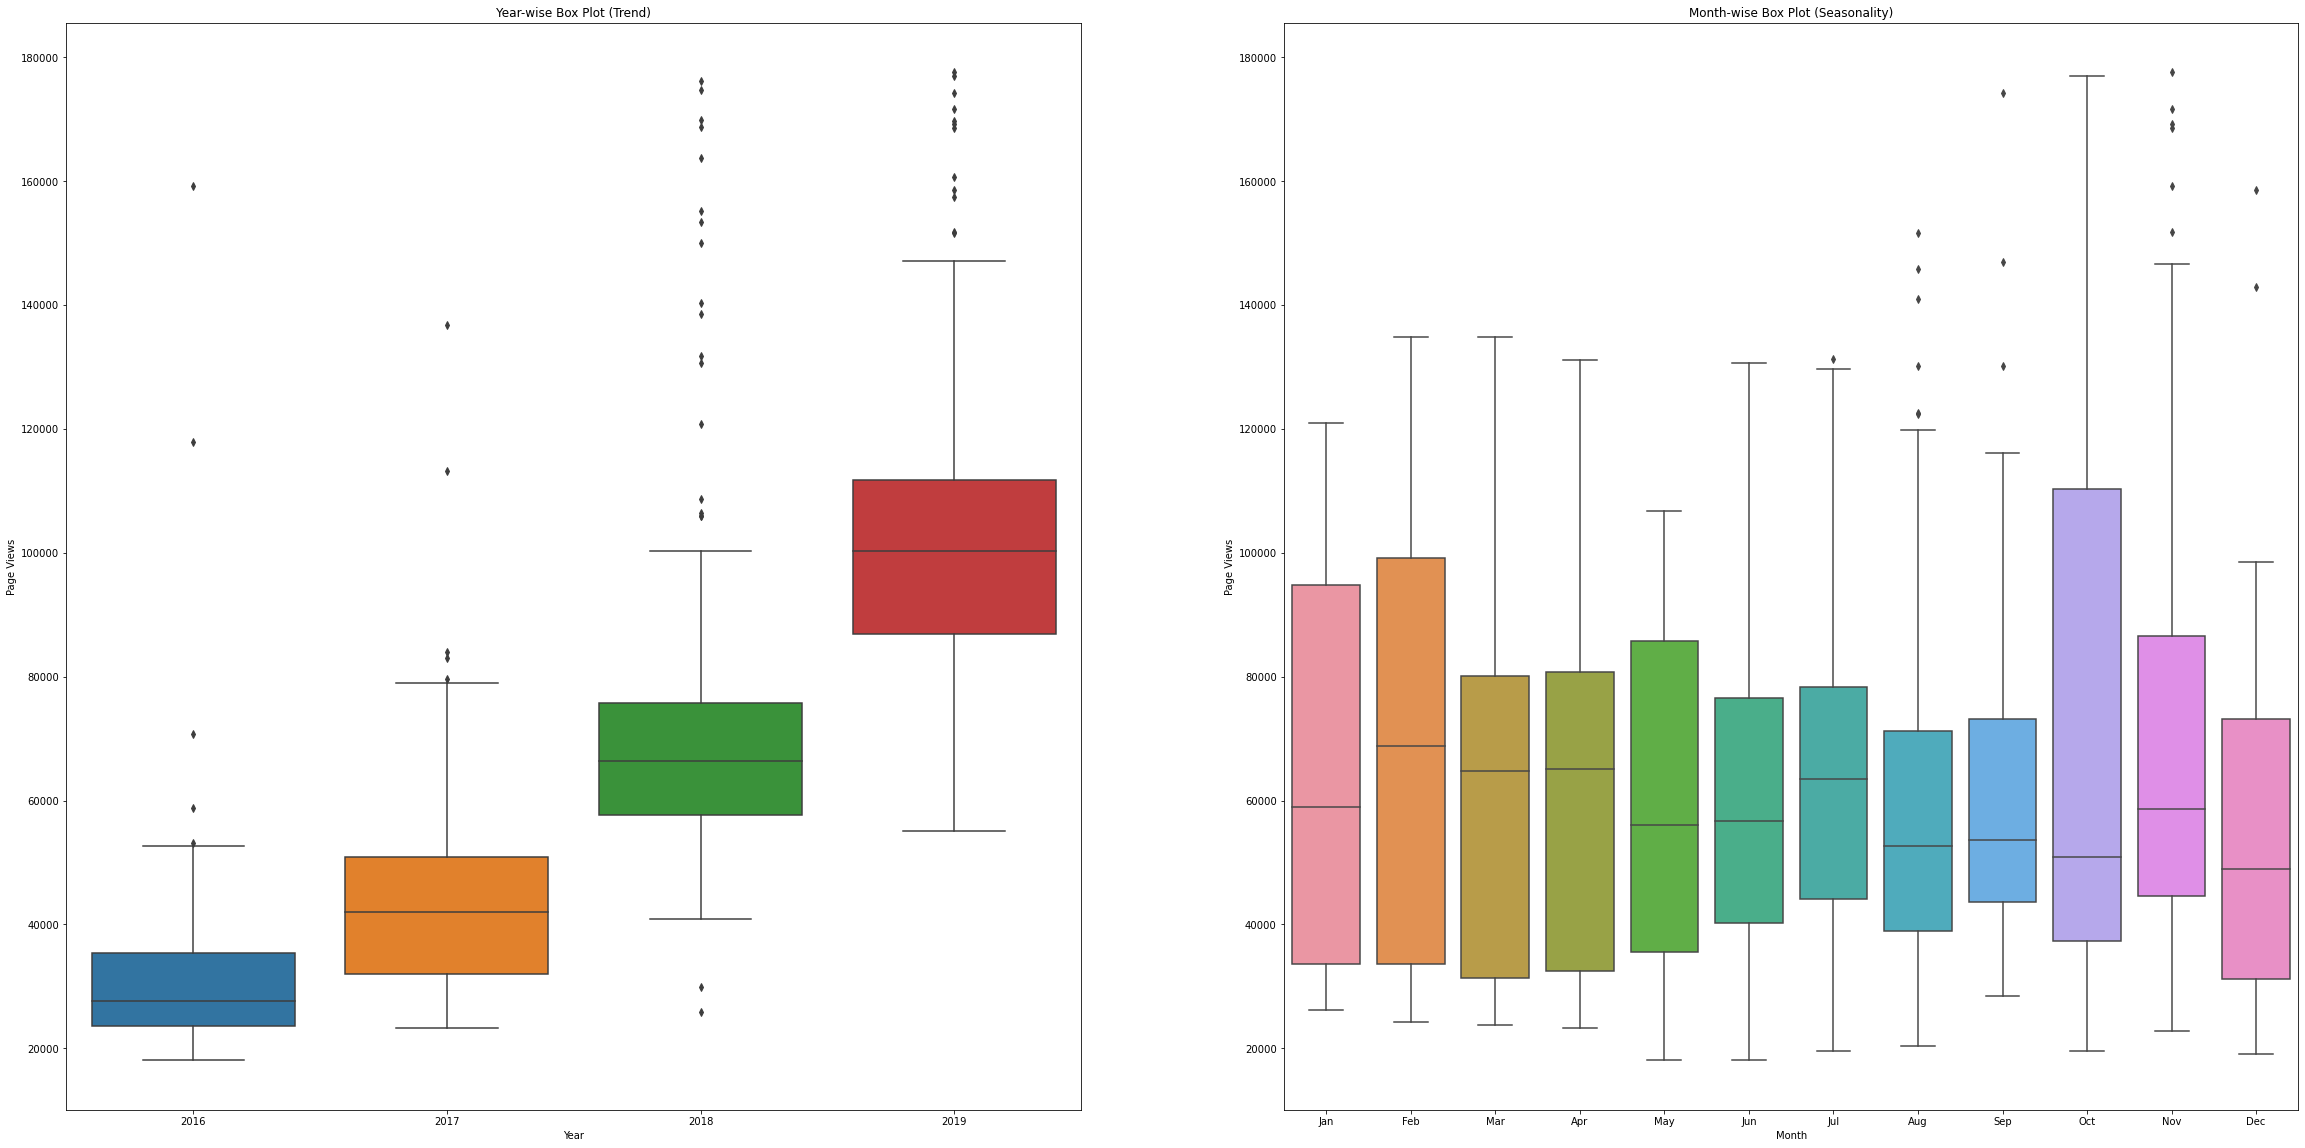

In [11]:
# Prepare data for box plots 
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig,axis = plt.subplots(1,2)
fig.set_size_inches(40,20)
sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axis[0]).set(xlabel='Year', ylabel='Page Views')
sns.boxplot(x = df_box['month'], y = df_box['value'], 
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], 
            ax = axis[1]).set(xlabel='Month', ylabel='Page Views')
axis[0].set_title('Year-wise Box Plot (Trend)')
axis[1].set_title('Month-wise Box Plot (Seasonality)')

In [12]:
# Save image and return fig 
fig.savefig('box_plot.png')
